In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
class Perceptron:
    def __init__(self, input_size):
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()

    def activation(self, x):
        return 1 if x >= 0 else 0
    
    def predict(self, inputs):
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return self.activation(weighted_sum)

In [19]:
input_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 0, 0, 1])

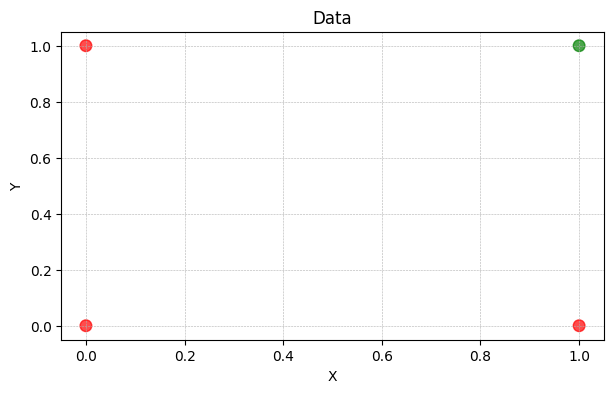

In [20]:
colors = ['red' if label == 0 else 'green' for label in labels]

plt.figure(figsize = (7, 4))

plt.scatter( x = input_data[:, 0], y = input_data[:, 1], c = colors, alpha = .7, s=70)

plt.title('Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, linestyle='--', linewidth=0.4)
plt.show()

In [21]:
perceptron = Perceptron(input_size=2)   

epochs = 100000
learning_rate = 0.01

In [22]:
for input_point, label in zip(input_data, labels):
    print(input_point, label)

[0 0] 0
[0 1] 0
[1 0] 0
[1 1] 1


In [23]:
for epoch in range(epochs):
    for input_point, label in zip(input_data, labels):
        prediction = perceptron.predict(input_point)
        error = label - prediction
        perceptron.weights += learning_rate * error * input_point
        perceptron.bias += learning_rate * error        

In [24]:
test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
predictions = []
for data_point in test_data:
    prediction = perceptron.predict(data_point)
    predictions.append(prediction)
    print(f"Entrada: {data_point}, Predicción: {prediction}")

Entrada: [0 0], Predicción: 0
Entrada: [0 1], Predicción: 0
Entrada: [1 0], Predicción: 0
Entrada: [1 1], Predicción: 1


In [25]:
perceptron.weights, perceptron.bias

(array([0.19148905, 0.31519219]), -0.32986560433108)

In [26]:
predictions

[0, 0, 0, 1]

In [27]:
decision_line_slope = -perceptron.weights[0] / perceptron.weights[1]
decision_line_intercept = -perceptron.bias / perceptron.weights[1]

# Crear puntos para trazar la línea de decisión
x_values = np.linspace(-0.5, 1.5, 100)
y_values = decision_line_slope * x_values + decision_line_intercept

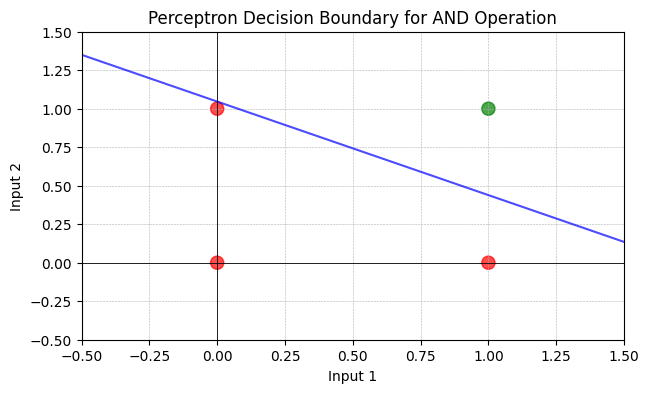

In [28]:
plt.figure(figsize=(7,  4))

plt.scatter(input_data[:, 0], input_data[:, 1], c=colors, marker='o', alpha=.7, s=90)
plt.plot(x_values, y_values, color='blue', linewidth=1.5, label='Decision Boundary', alpha=0.7)

plt.title('Perceptron Decision Boundary for AND Operation')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.axhline(0, color='black', linewidth=0.6)
plt.axvline(0, color='black', linewidth=0.6)
plt.grid(True, linestyle='--', linewidth=0.4)
plt.show()